# Chapter 6: The Discrete Wavelet Packet Transform

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("../src")
import DWT
from DWPT import get_DWPT, get_gamma, get_nu

## 6.2 Example: DWPT of Solar Physics Data

In [3]:
def test1(name_input, name_output, title, name_filter):
    """
    Reproduce plots of Figure 220 from WMTSA

    Input:
        type name_input = string
        name_input = Name of file containing time series
        type name_output = string
        name_output = Name of image file containing the plot
        type title = string
        title = Title to add to the plot
        type name_filter = string
        name_filter = Name of the wavelet filter
    Output:
        None
    """
    X = np.loadtxt('../data/' + name_input)
    N = np.shape(X)[0]
    W = get_DWPT(X, name_filter, 4)
    W4 = W[4]
    plt.figure(1, figsize=(10, 5))
    N4 = int(N / 16)
    for n in range(0, 16):
        W4n = W4[int(n * N4) : int((n + 1) * N4)]
        plt.plot((15 - n) * N4 + np.arange(0, N4), W4n, 'k-')
    plt.xlabel('m', fontsize=24)
    plt.xlim([0, N - 1])
    plt.ylim([- 2.5, 7.5])
    plt.title(title)
    plt.savefig('../figures/DWPT/' + name_output, format='eps')
    plt.show()

Compute DWPT coefficients of solar physics time series from WMTSA using the Haar wavelet filter.

Reproduce the upper plot of Figure 220 in WMTSA

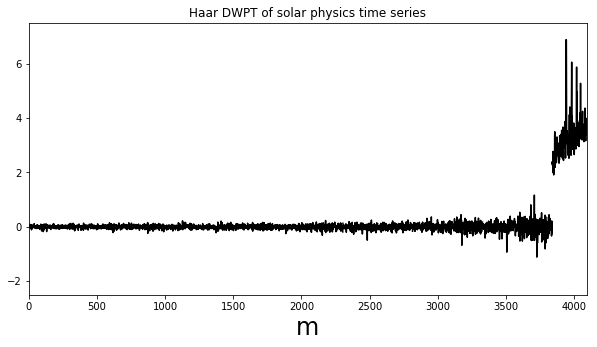

In [4]:
test1('magS4096.dat', 'magS4096_Haar.eps', 'Haar DWPT of solar physics time series', 'Haar')

Compute DWPT coefficients of solar physics time series from WMTSA using the D(4) wavelet filter.

Reproduce the upper middle plot of Figure 220 in WMTSA.

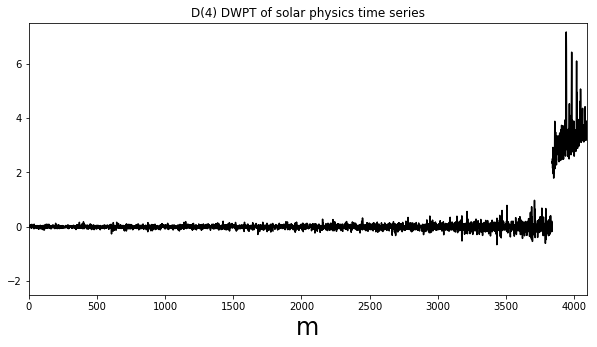

In [5]:
test1('magS4096.dat', 'magS4096_D4.eps', 'D(4) DWPT of solar physics time series', 'D4')

Compute DWPT coefficients of solar physics time series from WMTSA using the C(6) wavelet filter.

Reproduce the lower middle plot of Figure 220 in WMTSA.

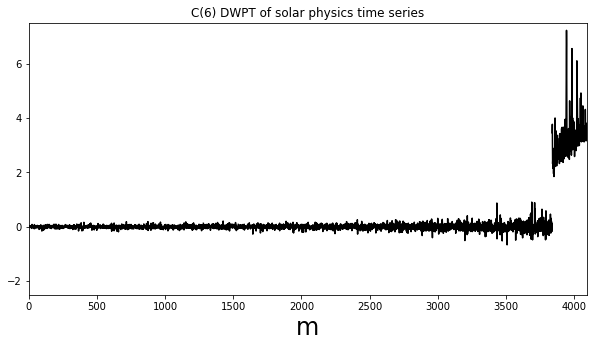

In [6]:
test1('magS4096.dat', 'magS4096_C6.eps', 'C(6) DWPT of solar physics time series', 'C6')

Compute DWPT coefficients of solar physics time series from WMTSA using the LA(8) wavelet filter.

Reproduce the lower plot of Figure 220 in WMTSA

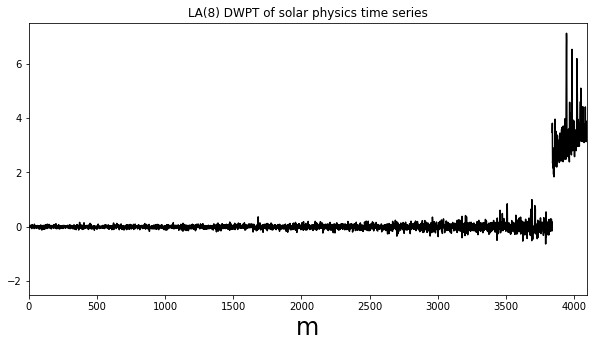

In [7]:
test1('magS4096.dat', 'magS4096_LA8.eps', 'LA(8) DWPT of solar physics time series', 'LA8')

In [8]:
def test2():
    """
    Reproduce plot of Figure 222 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/magS4096.dat')
    N = np.shape(X)[0]
    W = get_DWPT(X, 'LA8', 4)
    W4 = W[4]
    nu = get_nu('LA8', 4)
    (gamB, gamE) = get_gamma('LA8', 4, N)
    dt = 1.0 / 24.0
    plt.figure(1, figsize=(15, 51))
    N4 = int(N / 16)
    # Plot data
    plt.subplot2grid((17, 1), (16, 0))
    plt.plot(dt * np.arange(0, N), X, 'k', label='X')
    plt.xlim([0, dt * (N - 1)])
    plt.xlabel('t (days)')
    plt.legend(loc=1)
    # Plot 15 DWPT vectors of coefficients at level 4
    for n in range(1, 16):
        W4n = W4[int(n * N4) : int((n + 1) * N4)]
        plt.subplot2grid((17, 1), (n, 0))
        for t in range(0, N4):
            tshift = dt * ((16 * (t + 1) - 1 - abs(nu[3][n])) % N)
            if (t == 0):
                plt.plot((tshift, tshift), (0.0, W4n[t]), 'k', label='T' + str(nu[3][n]) + 'W4,' + str(n))
            else:
                plt.plot((tshift, tshift), (0.0, W4n[t]), 'k')
        plt.axvline(dt * gamB[3][n], linewidth=1, color='red')
        plt.axvline(dt * gamE[3][n], linewidth=1, color='red')
        plt.xlim([0, dt * (N - 1)])
        plt.legend(loc=1)
    # Plot first DWPT vector of coefficients at level 4
    W40 = W4[0 : N4]
    plt.subplot2grid((17, 1), (0, 0))
    tshift = np.zeros(N4)
    for t in range(0, N4):
        tshift[t] = dt * ((16 * (t + 1) - 1 - abs(nu[3][0])) % N)
    torder = np.argsort(tshift)
    plt.plot(tshift[torder], W40[torder], 'k', label='T' + str(nu[3][0]) + 'W4,0')
    plt.axvline(dt * gamB[3][0], linewidth=1, color='red')
    plt.axvline(dt * gamE[3][0], linewidth=1, color='red')
    plt.xlim([0, dt * (N - 1)])
    plt.legend(loc=1)
    plt.savefig('../figures/DWPT/magS4096_W4.eps', format='eps')
    plt.show()

Compute LA8 DWPT of the solar physics time series from WMTSA.

Reproduce Figure 222 in WMTSA.

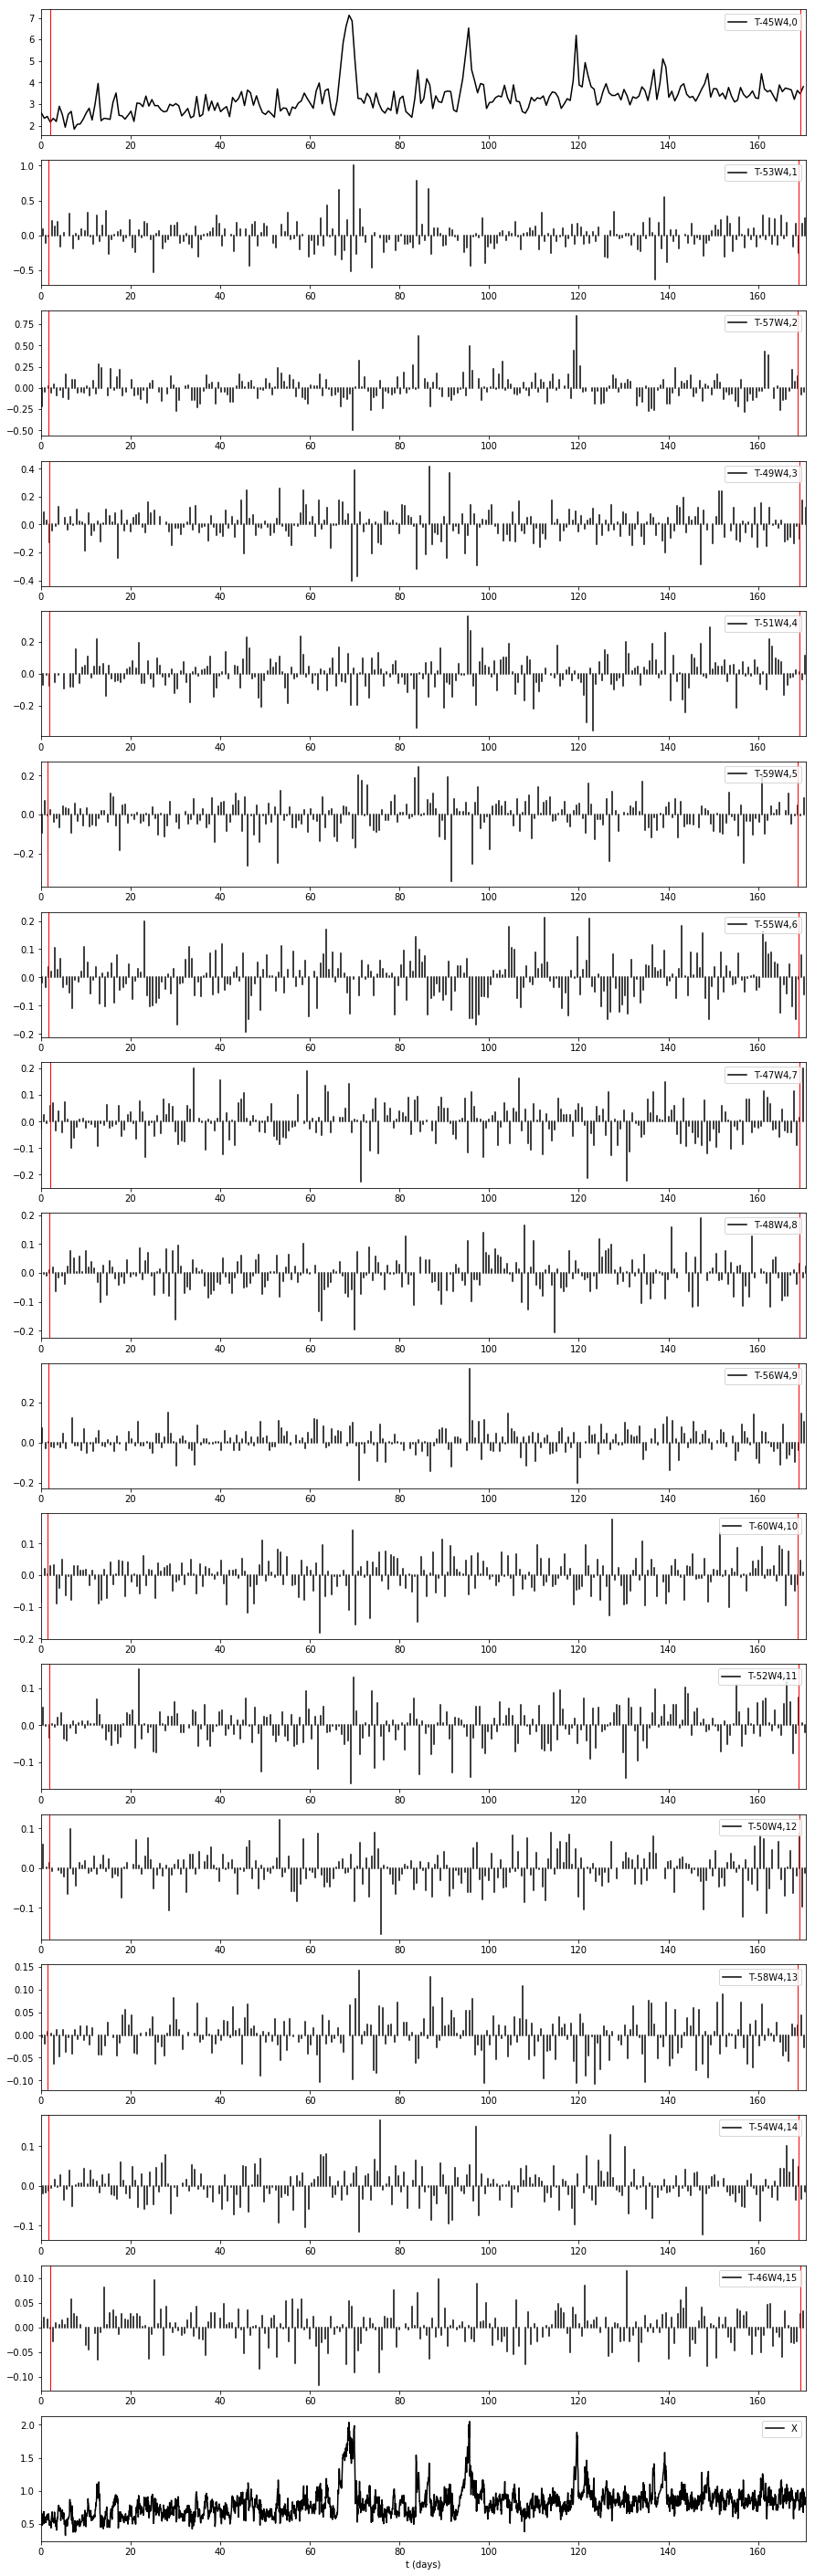

In [9]:
test2()